In [52]:
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np

In [82]:
def apply_global_median_threshold(im):
    im = im[:, :, 0]
    median_threshold = np.median(im.flatten())
    return (im >= median_threshold) * 255

In [115]:
def neighbours(x, y, img):
    return [ img[x-1][y], img[x-1][y+1], img[x][y+1], img[x+1][y+1],     # P2,P3,P4,P5
                img[x+1][y], img[x+1][y-1], img[x][y-1], img[x-1][y-1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0]      # P2, P3, ..., P9, P2
    return sum( (n1, n2) == (0, 255) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def zhang_suen(image):
    final_image = image.copy()

    rows, columns = final_image.shape
    has_pixels_to_process = True
    
    while has_pixels_to_process:   #  iterates until no further changes occur in the image
        has_pixels_to_process = False
        # Step 1
        points_to_flip = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):                
                n = neighbours(x, y, final_image)
                P2,P3,P4,P5,P6,P7,P8,P9 = n
                if (final_image[x][y] == 0 and    # Condition 0: P1 is filled
                    2 <= sum(n)/255 <= 6 and      # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and       # Condition 2: S(P1)=1 (Has only one transition)  
                    P2 * P4 * P6 == 0 and         # Up, right or down are empty
                    P4 * P6 * P8 == 0):           # Right, down or left are empty
                    points_to_flip.append((x,y))
        for x, y in points_to_flip:
            has_pixels_to_process = True
            final_image[x][y] = 255
        
        # Step 2
        points_to_flip = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):                
                n = neighbours(x, y, final_image)
                P2,P3,P4,P5,P6,P7,P8,P9 = n
                if (final_image[x][y] == 0 and    # Condition 0
                    2 <= sum(n) / 255 <= 6  and   # Condition 1
                    transitions(n) == 1 and       # Condition 2
                    P2 * P4 * P8 == 0 and         # Left, up and right are empty
                    P2 * P6 * P8 == 0):           # Up, left and down are empty
                    points_to_flip.append((x,y))
        print(points_to_flip)
        for x, y in points_to_flip:
            has_pixels_to_process = True
            final_image[x][y] = 255
    return final_image

In [113]:

def show_before_after_img(im1, im2):
    fig, ax = plt.subplots(1, 2)
    ax1, ax2 = ax.ravel()
    ax1.imshow(im1, cmap=plt.cm.gray)
    ax1.set_title('Original binary image')
    ax1.axis('off')
    ax2.imshow(im2, cmap=plt.cm.gray)
    ax2.set_title('Skeleton of the image')
    ax2.axis('off')
    plt.show()

In [114]:
image = io.imread('./images/exerc3a.bmp')
thresholded_image = apply_global_median_threshold(image)
processed_image = zhang_suen(thresholded_image)
show_before_after_img(image, processed_image)

TypeError: 'int' object is not iterable

[]
[(21, 23), (22, 23), (23, 23), (24, 23), (25, 23), (26, 23), (27, 23), (28, 23), (29, 23), (30, 23), (31, 23), (32, 23), (33, 23), (42, 24), (42, 25), (42, 26), (42, 27), (42, 28), (42, 29), (42, 30), (42, 31), (42, 32), (42, 33), (42, 34), (43, 23), (44, 23), (45, 23), (46, 23), (47, 23), (48, 23), (49, 23), (50, 23), (51, 23), (52, 23), (53, 23), (54, 23), (55, 23), (56, 23), (57, 13), (57, 14), (57, 15), (57, 16), (57, 17), (57, 18), (57, 19), (57, 20), (57, 21), (57, 22), (57, 23), (57, 37), (57, 38), (57, 39), (57, 40), (57, 41), (57, 42), (57, 43), (57, 44), (57, 45), (57, 46)]
[]
[(21, 22), (22, 22), (23, 22), (24, 22), (25, 22), (26, 22), (27, 22), (28, 22), (29, 22), (30, 22), (31, 22), (32, 22), (33, 22), (41, 24), (41, 25), (41, 26), (41, 27), (41, 28), (41, 29), (41, 30), (41, 31), (41, 32), (41, 33), (41, 34), (42, 23), (43, 22), (44, 22), (45, 22), (46, 22), (47, 22), (48, 22), (49, 22), (50, 22), (51, 22), (52, 22), (53, 22), (54, 22), (55, 22), (56, 13), (56, 14), (5

[]
[(21, 37), (22, 38), (23, 39), (24, 40), (25, 41), (26, 42), (27, 43), (28, 44), (29, 45), (30, 46), (30, 47)]
[]
[(21, 38), (22, 39), (23, 40), (24, 41), (25, 42), (26, 43), (27, 44), (28, 45), (29, 46)]
[]
[(21, 39), (22, 40), (23, 41), (24, 42), (25, 43), (26, 44), (27, 45), (28, 46), (28, 47)]
[]
[(21, 40), (22, 41), (23, 42), (24, 43), (25, 44), (26, 45), (27, 46)]
[]
[(21, 41), (22, 42), (23, 43), (24, 44), (25, 45), (26, 46), (26, 47)]
[]
[(21, 42), (22, 43), (23, 44), (24, 45), (25, 46)]
[]
[(21, 43), (22, 44), (23, 45), (24, 46), (24, 47)]
[]
[(21, 44), (22, 45), (23, 46)]
[]
[(21, 45), (22, 46), (22, 47)]
[]
[(21, 46)]
[]
[]


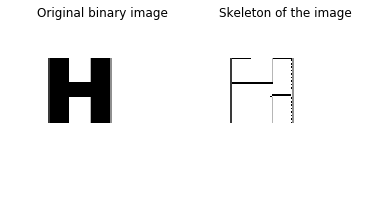

In [108]:
image = io.imread('./images/exerc3b.bmp')[:, :, 0]
processed_image = zhang_suen(image)
show_before_after_img(image, processed_image)